<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/DS-Practice-Notebooks/DS04-DL-NLP/ImageClassification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing packages

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [ ]:
#Dataset
from tensorflow.keras.datasets import mnist

In [ ]:
#Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
x_train[0]

In [ ]:
#View that image
plt.imshow(x_train[46], cmap='grey')

In [ ]:
y_train[46]

In [ ]:
#Counting total number of images
len(x_train), len(x_test)

In [ ]:
#Counting total number of y
len(y_train), len(y_test)

In [ ]:
plt.imshow(x_train[46], cmap='grey')

## Image classification with ANN

In [ ]:
x_train

In [ ]:
x_train.max()

In [ ]:
#Reshaping the data to single line now its in 28x28(784) - list of list
x_train=x_train.reshape(-1,784).astype('float32')/255.0 #Flattern and normalize
x_test=x_test.reshape(-1,784).astype('float32')/255.0
x_train.shape, x_test.shape

In [ ]:
len(x_train[0]) #it means 1 is converted into 784 columns

In [ ]:
x_test[0]

In [ ]:
x_train.shape[1]

In [ ]:
#Model arcitecture
model=Sequential()
model.add(Dense(512, input_shape=(x_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

In [ ]:
#Visualization - Loss
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.title('Train_loss - Test_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

#Visualization - Accuracy
plt.subplot(1,2,2)
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.title('Train_accuracy - Test_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report

y_pred_train=model.predict(x_train)
y_pred_train=np.argmax(y_pred_train,axis=1)
print(classification_report(y_train,y_pred_train))

y_pred_test=model.predict(x_test)
y_pred_test=np.argmax(y_pred_test,axis=1)
print(classification_report(y_test,y_pred_test))


## ImageClassification ANN - With hard data(Fashion mnist)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
x_train[100]

In [ ]:
y_train[100]

In [ ]:
plt.imshow(x_train[100], cmap='grey')

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[i], cmap='grey')
  plt.title(y_train[i])
  plt.axis('off')

In [ ]:
#Normalize
#Reshaping the data to single line now its in 28x28(784) - list of list
x_train=x_train.reshape(-1,784).astype('float32')/255.0
x_test=x_test.reshape(-1,784).astype('float32')/255.0
x_train.shape, x_test.shape

In [ ]:
x_train.shape[1]

In [ ]:
#Model arcitecture
model=Sequential()
model.add(Dense(512, input_shape=(x_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

In [ ]:
#Visualization - Loss
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.title('Train_loss - Test_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

#Visualization - Accuracy
plt.subplot(1,2,2)
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.title('Train_accuracy - Test_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report

y_pred_train=model.predict(x_train)
y_pred_train=np.argmax(y_pred_train,axis=1)
print(classification_report(y_train,y_pred_train))

y_pred_test=model.predict(x_test)
y_pred_test=np.argmax(y_pred_test,axis=1)
print(classification_report(y_test,y_pred_test))


## ANN with more noisy data

In [ ]:
# Save kaggle json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

In [ ]:
!unzip '/content/dog-and-cat-classification-dataset.zip'

In [ ]:
path='/content/PetImages'

train_dataset=keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2, #Take 80% data except this 20%
    subset='training',
    seed=123,
    image_size=(256,256),
    batch_size=32
)

test_dataset=keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,  #Take 20% data except of this 80%
    subset='validation',
    seed=123,
    image_size=(256,256),
    batch_size=32
)

Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

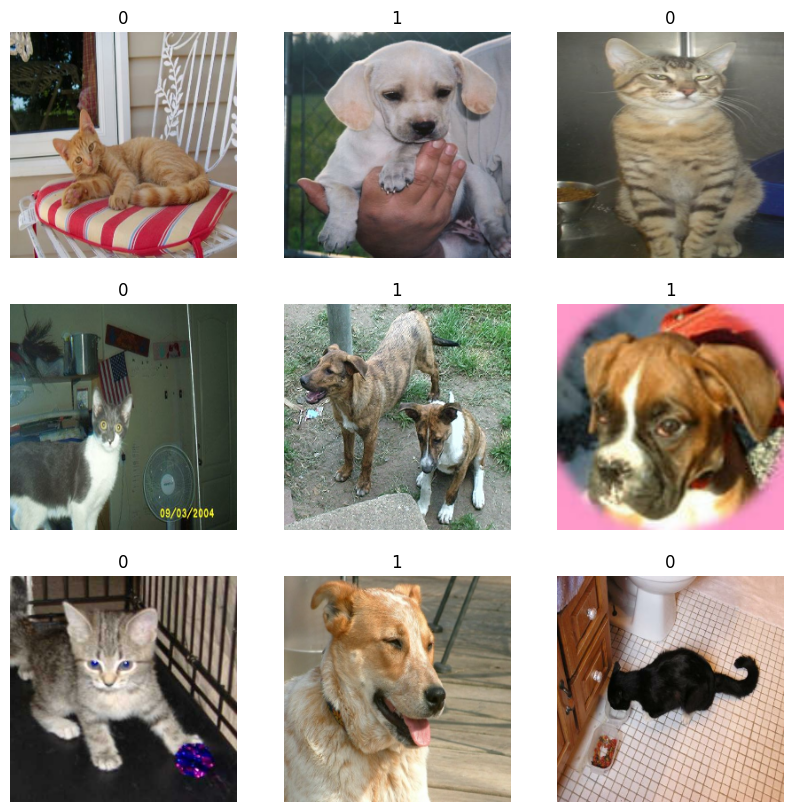

In [ ]:
plt.figure(figsize=(10,10))
for image,label in train_dataset.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(int(label[i]))
    plt.axis('off')
  plt.show()

In [ ]:
x_train,y_train=train_dataset.as_numpy_iterator().next()
x_test,y_test=test_dataset.as_numpy_iterator().next()

In [ ]:
x_train

array([[[[3.15234375e+01, 2.85234375e+01, 1.35234375e+01],
         [2.67131348e+01, 2.37131348e+01, 8.71313477e+00],
         [2.68726807e+01, 2.29508057e+01, 1.07164307e+01],
         ...,
         [1.58248169e+02, 1.53724731e+02, 1.46295044e+02],
         [1.54928589e+02, 1.50405151e+02, 1.42975464e+02],
         [1.53476562e+02, 1.48953125e+02, 1.41523438e+02]],

        [[2.45703125e+01, 2.15703125e+01, 6.57031250e+00],
         [2.40267334e+01, 2.10267334e+01, 6.02673340e+00],
         [2.96608887e+01, 2.57390137e+01, 1.35046387e+01],
         ...,
         [1.60340576e+02, 1.54703125e+02, 1.39728882e+02],
         [1.59222046e+02, 1.52832642e+02, 1.38234375e+02],
         [1.57859375e+02, 1.52289062e+02, 1.37281250e+02]],

        [[3.16171875e+01, 2.86171875e+01, 1.36171875e+01],
         [2.68515625e+01, 2.38515625e+01, 8.85156250e+00],
         [2.44205322e+01, 2.04986572e+01, 8.26428223e+00],
         ...,
         [1.62078125e+02, 1.55539062e+02, 1.29673218e+02],
         [

In [ ]:
x_train.max()

np.float32(255.0)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train.max()

np.float32(1.0)

In [ ]:
x_train.shape #32 batch size,150x15 size 3-RGB

(32, 256, 256, 3)

In [ ]:
len(x_train[0][1])

256

In [ ]:
model=Sequential()
model.add(Dense(1024,input_shape=(256*256*3,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1024)           │   201,327,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,016,769 (770.63 MB)

 Trainable params: 202,016,769 (770.63 MB)

 Non-trainable params: 0 (0.00 B)

### Reshaping

In [ ]:
x_train_flat=x_train.reshape(x_train.shape[0],-1)
x_test_flat=x_test.reshape(x_test.shape[0],-1)

In [ ]:
len(x_train_flat[0])

196608

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train_flat,y_train,epochs=10,validation_data=(x_test_flat,y_test), batch_size=4)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.5211 - loss: 50.6774 - val_accuracy: 0.5938 - val_loss: 47.9188
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6119 - loss: 33.4863 - val_accuracy: 0.4062 - val_loss: 16.1649
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.4085 - loss: 22.0348 - val_accuracy: 0.5625 - val_loss: 18.5121
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7351 - loss: 20.7489 - val_accuracy: 0.5938 - val_loss: 58.1660
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6749 - loss: 27.8538 - val_accuracy: 0.4375 - val_loss: 24.0091
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.5215 - loss: 15.5757 - val_accuracy: 0.4062 - val_loss: 58.8019
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.6149 - loss: 17.0436 - val_accuracy: 0.4688 - val_loss: 20.1295
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8485 - loss: 2.7666 - val_accuracy: 0.4062 - val_loss: 9

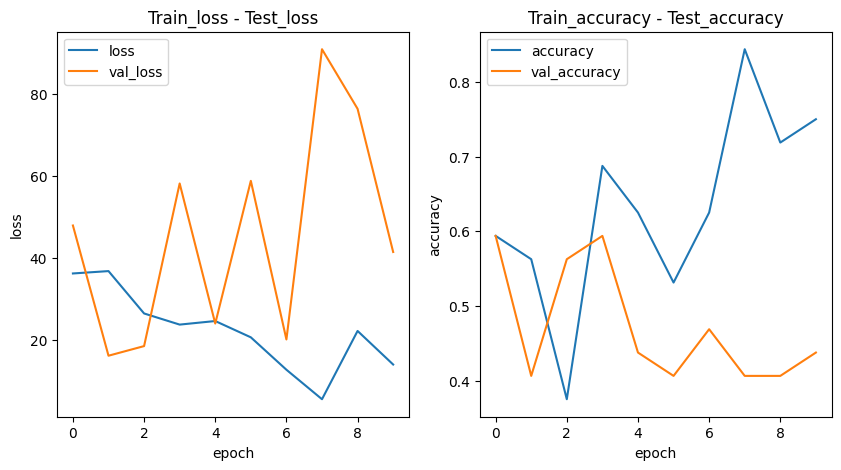

In [ ]:
#Visualization - Loss
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.title('Train_loss - Test_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

#Visualization - Accuracy
plt.subplot(1,2,2)
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.title('Train_accuracy - Test_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report

y_pred_train=model.predict(x_train_flat)
y_pred_train=np.argmax(y_pred_train,axis=1)
print(classification_report(y_train,y_pred_train))

y_pred_test=model.predict(x_test_flat)
y_pred_test=np.argmax(y_pred_test,axis=1)
print(classification_report(y_test,y_pred_test))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.47      1.00      0.64        15
           1       0.00      0.00      0.00        17

    accuracy                           0.47        32
   macro avg       0.23      0.50      0.32        32
weighted avg       0.22      0.47      0.30        32

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
              precision    recall  f1-score   support

           0       0.41      1.00      0.58        13
           1       0.00      0.00      0.00        19

    accuracy                           0.41        32
   macro avg       0.20      0.50      0.29        32
weighted avg       0.17      0.41      0.23        32



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
